# Scan aerosols 
=========================


- Sylvie Dagoret-Campagne
- Affiliation LAL-IN2P3-CNRS
- Work : LSST & StarDice
- date December 1st 2017


In [22]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
import pandas as pd
import os
import re 

In [24]:
import astropy.units as u

In [25]:
from scipy.interpolate import interp1d

In [26]:
import sys
sys.path.append('../libradtransim')

In [27]:
import libsimulateTranspLSSTScattAbsAer as atm

In [28]:
#help(atm)

In [29]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

*** Ozone absorption is removed to understand ***

## atmosphere without aerosols

In [30]:
beta_aerosol=np.linspace(0.,0.5,10)
lambda0_aerosol=500. # nm
airmass=1.
pwv=4.0     # mm
ozone=0. # DU
alpha=1.0 # angstrom coefficients

In [31]:
path,thefile=atm.ProcessSimulation(airmass,pwv,ozone) 
fullfilename=os.path.join(path,thefile)
atm_data=np.loadtxt(fullfilename)
wl_atm0=atm_data[:,0]
tr_atm0=atm_data[:,1]  


--------------------------------------------
 1) airmass =  1.0
 2) pwv =  4.0
 3) oz =  0.0
--------------------------------------------
('Running uvspec with input file: ', 'simulations/RT/2.0.1/LS/pp/us/sa/rt/in/RT_LS_pp_us_sa_rt_z10_wv40_oz0.INP')
('Output to file                : ', 'simulations/RT/2.0.1/LS/pp/us/sa/rt/out/RT_LS_pp_us_sa_rt_z10_wv40_oz0.OUT')
('uvspec cmd: ', '/Users/dagoret//MacOSX/External/libRadtran/libRadtran-2.0.1/bin/uvspec  < simulations/RT/2.0.1/LS/pp/us/sa/rt/in/RT_LS_pp_us_sa_rt_z10_wv40_oz0.INP > simulations/RT/2.0.1/LS/pp/us/sa/rt/out/RT_LS_pp_us_sa_rt_z10_wv40_oz0.OUT')


## Atmosphere with variation of $\beta$

$$
\tau = \beta \lambda^\alpha
$$

In [32]:
all_wl_atm= []
all_tr_atm= []

for beta in beta_aerosol:
      path,thefile=atm.ProcessSimulationaer2(airmass,pwv,ozone,alpha,beta) 
      fullfilename=os.path.join(path,thefile)
      atm_data=np.loadtxt(fullfilename)
      wl_atm=atm_data[:,0]
      tr_atm=atm_data[:,1]  
      all_wl_atm.append(wl_atm) 
      all_tr_atm.append(tr_atm) 

--------------------------------------------
 1) airmass =  1.0
 2) pwv =  4.0
 3) oz =  0.0
 4) alpha =  1.0
 5) beta =  0.0
--------------------------------------------
('Running uvspec with input file: ', 'simulations/RT/2.0.1/LS/pp/us/sa/rt/in/RT_LS_pp_us_sa_rt_z10_wv40_oz0_aer2100.INP')
('Output to file                : ', 'simulations/RT/2.0.1/LS/pp/us/sa/rt/out/RT_LS_pp_us_sa_rt_z10_wv40_oz0_aer2100.OUT')
('uvspec cmd: ', '/Users/dagoret//MacOSX/External/libRadtran/libRadtran-2.0.1/bin/uvspec  < simulations/RT/2.0.1/LS/pp/us/sa/rt/in/RT_LS_pp_us_sa_rt_z10_wv40_oz0_aer2100.INP > simulations/RT/2.0.1/LS/pp/us/sa/rt/out/RT_LS_pp_us_sa_rt_z10_wv40_oz0_aer2100.OUT')
--------------------------------------------
 1) airmass =  1.0
 2) pwv =  4.0
 3) oz =  0.0
 4) alpha =  1.0
 5) beta =  0.0555555555556
--------------------------------------------
('Running uvspec with input file: ', 'simulations/RT/2.0.1/LS/pp/us/sa/rt/in/RT_LS_pp_us_sa_rt_z10_wv40_oz0_aer2100.INP')
('Output to file  

### bind together wavelength and transmission

In [33]:
wl_and_tr_atm=zip(all_wl_atm,all_tr_atm)  

## plot air-transmission

### in linear scale

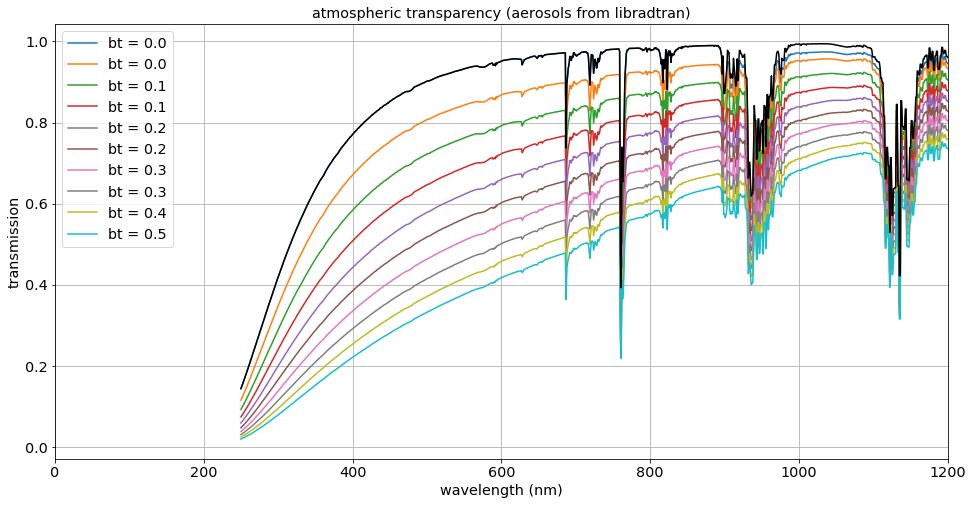

In [34]:
idx=0
for wl_atm,tr_atm in wl_and_tr_atm:
    thelabel="bt = {}".format(int(beta_aerosol[idx]*10)/10.)
    plt.plot(wl_atm,tr_atm,label=thelabel)
    idx+=1
plt.plot(wl_atm0,tr_atm0,'k')
plt.grid()
plt.title("atmospheric transparency (aerosols from libradtran)")
plt.xlabel("wavelength (nm)")
plt.ylabel("transmission")
plt.legend(loc=2)
plt.xlim(0.,1200.)
plt.savefig("atm-aer-transm-rt-beta-lin.png")

### in log scale

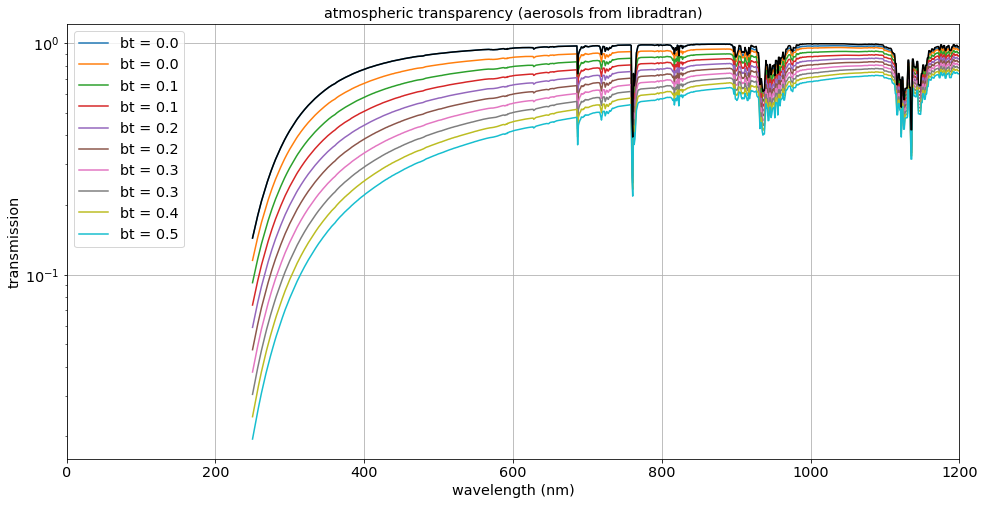

In [35]:
idx=0
for wl_atm,tr_atm in wl_and_tr_atm:
    thelabel="bt = {}".format(int(beta_aerosol[idx]*10)/10.)
    plt.semilogy(wl_atm,tr_atm,label=thelabel)
    idx+=1
plt.semilogy(wl_atm0,tr_atm0,'k')
plt.grid()
plt.title("atmospheric transparency (aerosols from libradtran)")
plt.xlabel("wavelength (nm)")
plt.ylabel("transmission")
plt.xlim(0.,1200.)
plt.legend(loc=2)
plt.savefig("atm-aer-transm-rt-beta-log.png")

### Plot ratio transparency with aerosols/transparency witout aerosols


- for $\beta$ variation

In [45]:
idx=0
for wl_atm,tr_atm in wl_and_tr_atm:
    thelabel="bt = {}".format(int(beta_aerosol[idx]*10)/10.)
    plt.loglog(wl_atm,tr_atm/tr_atm0,label=thelabel)
    idx+=1
plt.grid()
plt.title("atmosphere transparency ratio (aerosols from libradtran)")
plt.xlabel("wavelength (nm)")
plt.ylabel("transmission")
plt.xlim(200.,1200.)
plt.legend(loc=2)
plt.ylim(0.1,1.)
plt.savefig("atm-aer-transm-ratio-rt-beta-log.png")

TypeError: 'float' object has no attribute '__getitem__'

## Variation of Angstrom coefficient $\alpha$

In [37]:
beta_aerosol=0.05
lambda0_aerosol=600. # nm
airmass=1.
pwv=4.0     # mm
ozone=0. # DU
alpha_aerosol=np.linspace(0.,3.,10) # angstrom coefficients

In [38]:
all_wl_atm= []
all_tr_atm= []

for alpha in alpha_aerosol:
      path,thefile=atm.ProcessSimulationaer2(airmass,pwv,ozone,alpha,beta_aerosol) 
      fullfilename=os.path.join(path,thefile)
      atm_data=np.loadtxt(fullfilename)
      wl_atm=atm_data[:,0]
      tr_atm=atm_data[:,1]  
      all_wl_atm.append(wl_atm) 
      all_tr_atm.append(tr_atm) 

--------------------------------------------
 1) airmass =  1.0
 2) pwv =  4.0
 3) oz =  0.0
 4) alpha =  0.0
 5) beta =  0.05
--------------------------------------------
('Running uvspec with input file: ', 'simulations/RT/2.0.1/LS/pp/us/sa/rt/in/RT_LS_pp_us_sa_rt_z10_wv40_oz0_aer20.INP')
('Output to file                : ', 'simulations/RT/2.0.1/LS/pp/us/sa/rt/out/RT_LS_pp_us_sa_rt_z10_wv40_oz0_aer20.OUT')
('uvspec cmd: ', '/Users/dagoret//MacOSX/External/libRadtran/libRadtran-2.0.1/bin/uvspec  < simulations/RT/2.0.1/LS/pp/us/sa/rt/in/RT_LS_pp_us_sa_rt_z10_wv40_oz0_aer20.INP > simulations/RT/2.0.1/LS/pp/us/sa/rt/out/RT_LS_pp_us_sa_rt_z10_wv40_oz0_aer20.OUT')
--------------------------------------------
 1) airmass =  1.0
 2) pwv =  4.0
 3) oz =  0.0
 4) alpha =  0.333333333333
 5) beta =  0.05
--------------------------------------------
('Running uvspec with input file: ', 'simulations/RT/2.0.1/LS/pp/us/sa/rt/in/RT_LS_pp_us_sa_rt_z10_wv40_oz0_aer233.INP')
('Output to file          

In [39]:
wl_and_tr_atm=zip(all_wl_atm,all_tr_atm)  

### linear scale

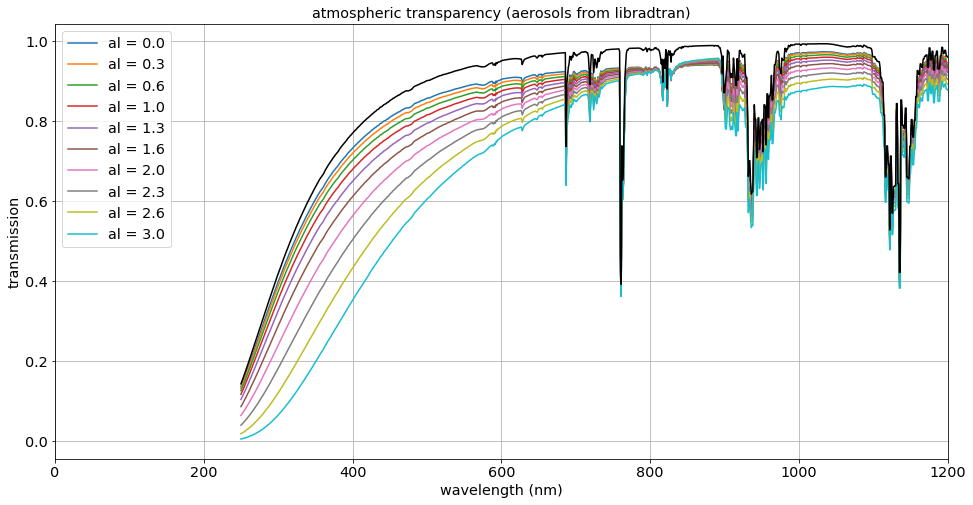

In [40]:
idx=0
for wl_atm,tr_atm in wl_and_tr_atm:
    thelabel="al = {}".format(int(alpha_aerosol[idx]*10)/10.)
    plt.plot(wl_atm,tr_atm,label=thelabel)
    idx+=1
plt.plot(wl_atm0,tr_atm0,'k')
plt.grid()
plt.title("atmospheric transparency (aerosols from libradtran)")
plt.xlabel("wavelength (nm)")
plt.ylabel("transmission")
plt.xlim(0.,1200.)
plt.legend(loc=2)
plt.savefig("atm-aer-transm-rt-alpha-lin.png")

### Log scale

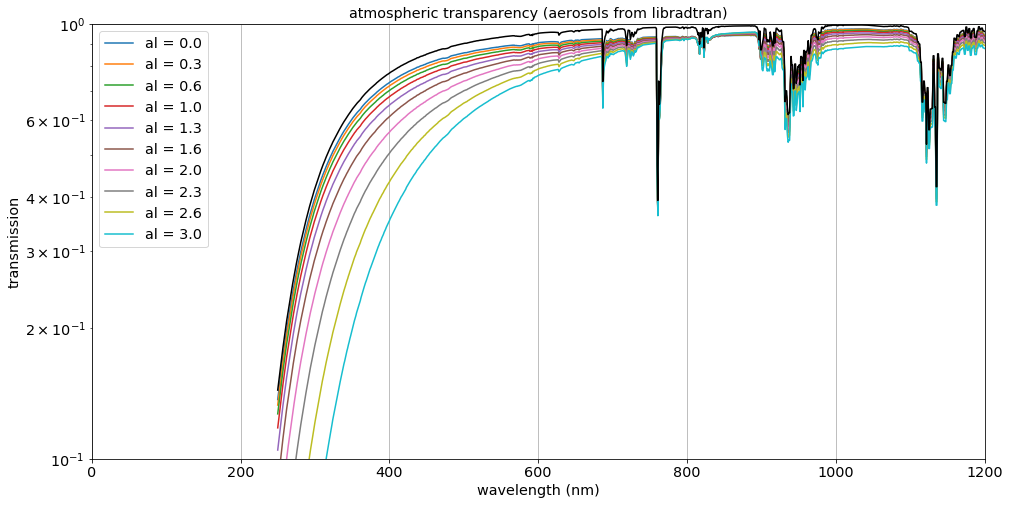

In [41]:
idx=0
for wl_atm,tr_atm in wl_and_tr_atm:
    thelabel="al = {}".format(int(alpha_aerosol[idx]*10)/10.)
    plt.semilogy(wl_atm,tr_atm,label=thelabel)
    idx+=1
plt.semilogy(wl_atm0,tr_atm0,'k')
plt.grid()
plt.title("atmospheric transparency (aerosols from libradtran)")
plt.xlabel("wavelength (nm)")
plt.ylabel("transmission")
plt.ylim(0.1,1.)
plt.xlim(0.,1200.)
plt.legend(loc=2)
plt.savefig("atm-aer-transm-rt-alpha-log.png")

### Ratio

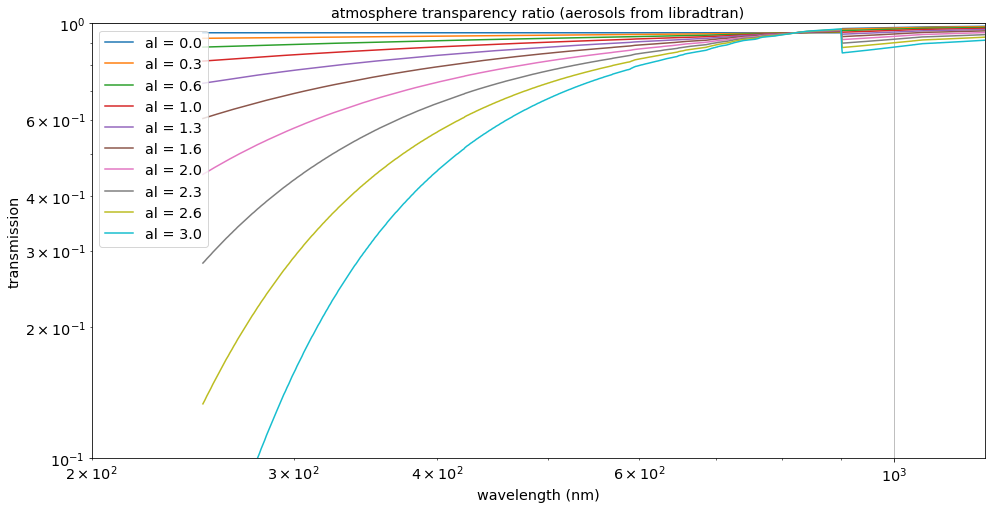

In [44]:
idx=0
for wl_atm,tr_atm in wl_and_tr_atm:
    thelabel="al = {}".format(int(alpha_aerosol[idx]*10)/10.)
    plt.loglog(wl_atm,tr_atm/tr_atm0,label=thelabel)
    idx+=1
plt.grid()
plt.title("atmosphere transparency ratio (aerosols from libradtran)")
plt.xlabel("wavelength (nm)")
plt.ylabel("transmission")
plt.xlim(200.,1200.)
plt.legend(loc=2)
plt.ylim(0.1,1.)
plt.savefig("atm-aer-transm-ratio-rt-alpha-log.png")